<div style="text-align: center;">
    <img src="img/logo.png" width="400" alt="logo_uba">
</div>

**Alumnos:** <br />
Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/IIA-TP2 <br />


In [28]:
# Setup
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Carga del dataset
housing = fetch_california_housing()

print(f'Data shape: {housing.data.shape}\nTarget shape: {housing.target.shape}')
print(f'Features: {housing.feature_names}')

Data shape: (20640, 8)
Target shape: (20640,)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [29]:
# Se crea el dataframe con los features
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Se agrega la columna target al dataframe 
df['Target'] = housing.target

# Cálculo de la matriz de correlación
correlation_matrix = df.corr()

# Matriz de correlación
print('Matriz de correlación (Full)')
print(correlation_matrix)
print('\n')

# Correlación feature-feature
print("Correlación entre features:")
print(correlation_matrix.loc[housing.feature_names, housing.feature_names])
print('\n')

# Correlación feature-target
print("Correlación entre features y el target:")
correlation_matrix_features_target = correlation_matrix['Target'].loc[housing.feature_names]
correlation_matrix_features_target.name = 'Target'
print(pd.DataFrame(correlation_matrix_features_target))
print('\n')

Matriz de correlación (Full)
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    Target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0

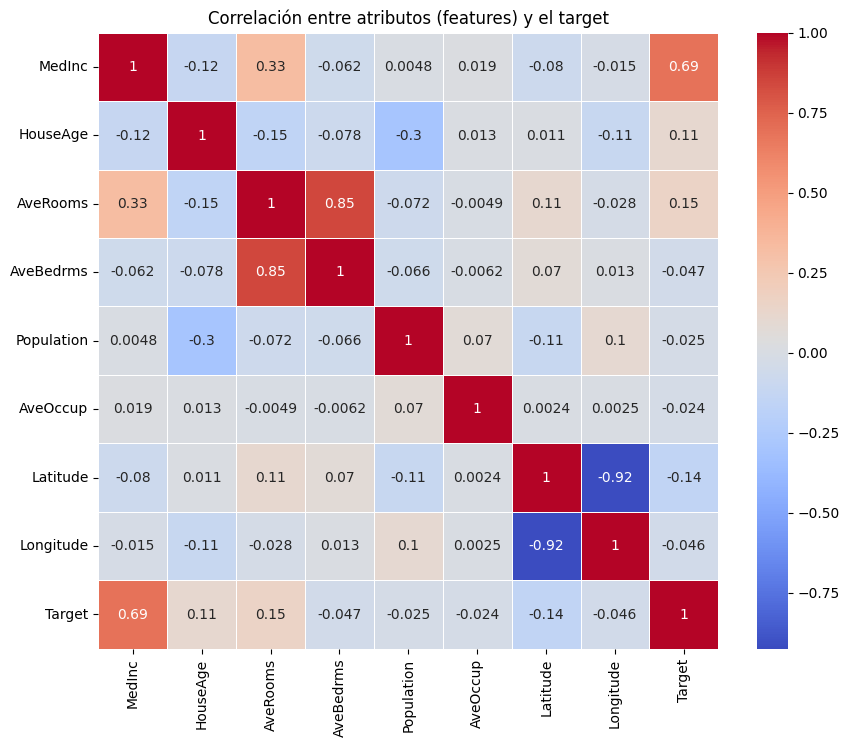

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlación entre atributos (features) y el target')
plt.show()

### Analisis de los resultados obtenidos

La mediana del ingreso (MedInc) tiene la mayor correlación positiva con el target (Valor de las casas) con un valor de 0,69. Esto indica que a medida que dicha mediana aumenta, también lo hará el valor de las casas, lo cual es intuitivo dado que las zonas con mayores ingresos suelen tener las viviendas de mayor precio.

En menor medida, el promedio de habitaciones (AveRooms) y la antigüedad de la casa (HouseAge), también tienen una correlación positiva con el atributo target. Esto sugiere que si bien hay influencia de estos features en el precio, lo haven débilmente. 

La latitud (Latitud)también posee una correlación negativa débil con el precio de las casas. Esto podría indicar que las viviendas ubicadas más al norte tienden a tener un previo más bajo.

El resto de los features presentan una correlación muy débil con el valor de las casas, mostrando una influencia limitada sobre esta.

Con respecto a la correlación entre features, el promedio de habitaciones (AveRooms) y el promedio de dormitorios (AveBedrms) poseen un valor muy elevado (0,85), lo cual es lógico dado que viviendas con más habitaciones suelen tener más dormitorios. 

La correlación elevada pero negativa entre longitud y latitud puede atribuirse a la forma que tiene el estado de California. Al observarse en un mapa, puede notarse que al disminuir la latitud (Movimiento hacia el Sur) la longitud aumentará (Movimiento hacia el Este).